In [1]:
from analyze import *
import os

# mount flight data folder as you like


# look through flight_data folder for files containing "aug" (lowercase or uppercase)
# and print out the file names with numbers
# files = [f for f inekf_vel os.listdir("flight_data") if "okt10" in f.lower() or "sepaa" in f.lower()]
# for i, f in enumerate(files):
#     print(i, f)

In [2]:
# path_1 = '../flight_data/Okt10_NN_long_oval_1.csv'
# path_2 = '../flight_data/Okt10_NN_long_oval_2.csv'
# path_4 = '../flight_data/Okt10_NN_long_oval_4.csv'
# data_1 = load_flight_data(path_1)
# data_2 = load_flight_data(path_2)
# data_4 = load_flight_data(path_4)
# data_1 = trim_nn_active(data_1)
# data_2 = trim_nn_active(data_2)
# data_4 = trim_nn_active(data_4)

# data_4 = trim_time(data_4, 0, 7)
# data = data_1
path_1 = '../flight_data/Saturday_okt12_Robin/Okt12_Orin_drone_TT.csv'
path_2 = '../flight_data/Saturday_okt12_Robin/Okt12_Orin_drone_TT2.csv'
path_3 = '../flight_data/Saturday_okt12_Robin/Okt12_Orin_drone_NN.csv'
path_4 = '../flight_data/Saturday_okt12_Robin/Okt12_Orin_drone_NN2.csv'

path_5 = '../flight_data/DroneModel/Okt24_Dummy_param_drone_model_alpha1_2.csv'

path_6 = '../flight_data/Dummy8_baseline/LOG00021_DUMMY_nn_fig8_success.BFL.csv'
path_7 = '../flight_data/Dummy8_baseline/LOG00009_30Sep_nn_flight_with_gates_0.4lower_DUMMY.BFL.csv'
path_8 = '../flight_data/Dummy8_baseline/LOG00005_30Sep_nn_flights_with_gates_DUMMY.BFL.csv'

path_9 = '../flight_data/okt_25_dummy/Okt25_Dummy_param_drone_model_2m_drift_GOOD_PROPS_1.csv'
path_10 = '../flight_data/okt_25_dummy/Okt25_Dummy_param_drone_model_2m_drift_GOOD_PROPS_ONLY_XY_2.csv'
path_11 = '../flight_data/okt_25_dummy/Okt25_Dummy_param_drone_model_2m_drift_GOOD_PROPS_ONLY_XY_3.csv'
path_12 = '../flight_data/okt_25_dummy/Okt25_Dummy_param_drone_model_2m_drift_GOOD_PROPS_ONLY_XY_4.csv'
path_13 = '../flight_data/okt_25_dummy/Okt25_Dummy_param_drone_model_2m_drift_GOOD_PROPS_ONLY_XY_5.csv'

path_14 = '../flight_data/okt_28_dummy/Okt28_Dummy_drone_fig8_normal_1.csv'
path_15 = '../flight_data/okt_28_dummy/Okt28_Dummy_drone_fig8_mocap+drone_model_1.csv'
path_16 = '../flight_data/okt_28_dummy/Okt28_Dummy_drone_fig8_mocap+drone_model_2.csv'



# data_1 = load_flight_data(path_1)
# data_2 = load_flight_data(path_2)
# data_3 = load_flight_data(path_3)


# data_4 = load_flight_data(path_4)
#data_5 = load_flight_data(path_5)
data_6 = load_flight_data(path_6)
data_7 = load_flight_data(path_7)
data_8 = load_flight_data(path_8)

# data_9 = load_flight_data(path_9)
# data_10 = load_flight_data(path_10)
# data_11 = load_flight_data(path_11)
# data_12 = load_flight_data(path_12)
# data_13 = load_flight_data(path_13)

data_14 = load_flight_data(path_14)
data_15 = load_flight_data(path_15)
data_16 = load_flight_data(path_16)

# data_1 = trim_nn_active(data_1)
# data_2 = trim_nn_active(data_2)
# data_4 = trim_nn_active(data_3)

def trim_nn_active(data):
    if 'nn_active' in data.keys():
        indices = data['nn_active']>0.
    else:
        indices = data['flightModeFlags'] > 8000
    data = {k: v[indices] for k, v in data.items() if isinstance(v, np.ndarray) and len(v) == len(indices)}
    data['t'] = data['t'] - data['t'][0]
    return data

data6 = trim_nn_active(data_6)
data7 = trim_nn_active(data_7)
data8 = trim_nn_active(data_8)
# data9 = trim_nn_active(data_9)
# data10 = trim_nn_active(data_10)
# data11 = trim_nn_active(data_11)
# data12 = trim_nn_active(data_12)
# data13 = trim_nn_active(data_13)

data14 = trim_nn_active(data_14)
data15 = trim_nn_active(data_15)
data16 = trim_nn_active(data_16)




Loading ../flight_data/Dummy8_baseline/LOG00021_DUMMY_nn_fig8_success.BFL.csv
Logging frequency: 991.7630678098245
Loading ../flight_data/Dummy8_baseline/LOG00009_30Sep_nn_flight_with_gates_0.4lower_DUMMY.BFL.csv
Logging frequency: 992.0007143803305
Loading ../flight_data/Dummy8_baseline/LOG00005_30Sep_nn_flights_with_gates_DUMMY.BFL.csv
Logging frequency: 992.1971608572197
Loading ../flight_data/okt_28_dummy/Okt28_Dummy_drone_fig8_normal_1.csv
Logging frequency: 470.3792077049724
Loading ../flight_data/okt_28_dummy/Okt28_Dummy_drone_fig8_mocap+drone_model_1.csv
Logging frequency: 464.6769793731715
Loading ../flight_data/okt_28_dummy/Okt28_Dummy_drone_fig8_mocap+drone_model_2.csv
Logging frequency: 495.9621557941305


In [37]:
data = data14
opti_indices = [i for i in range(len(data['t'])-1) if data['x_opti'][i]!=data['x_opti'][i+1]]
opti_time = data['t'][opti_indices]
print('opti freq:', 1/np.mean(np.diff(opti_time)))

dt = data['t'][1] - data['t'][0]
print('dt:', dt)



opti freq: 19.918990777221904
dt: 0.002268000000000825


In [33]:
# reload analyze
import importlib
import analyze
importlib.reload(analyze)



# animate
# race track
# r = 1.5
# gate_pos = np.array([
#     [ r,  -r, -1.5],
#     [ 0,   0, -1.5],
#     [-r,   r, -1.5],
#     [ 0, 2*r, -1.5],
#     [ r,   r, -1.5],
#     [ 0,   0, -1.5],
#     [-r,  -r, -1.5],
#     [ 0,-2*r, -1.5]
# ])
# gate_yaw = np.array([1,2,1,0,-1,-2,-1,0])*np.pi/2

# long oval
gate_pos = np.array([
    [1.5, -5., -1.5],
    [1.5,  5., -1.5],
    [0.0, 6.5, -1.5],
    [-1.5, 5., -1.5],
    [-1.5, -5., -1.5],
    [0.0, -6.5, -1.5]
])
gate_yaw = np.array([0, 0, 0.5, 1, 1, 1.5])*np.pi+np.pi/2

animate_data_multiple2(data, gate_pos=gate_pos, gate_yaw=gate_yaw)

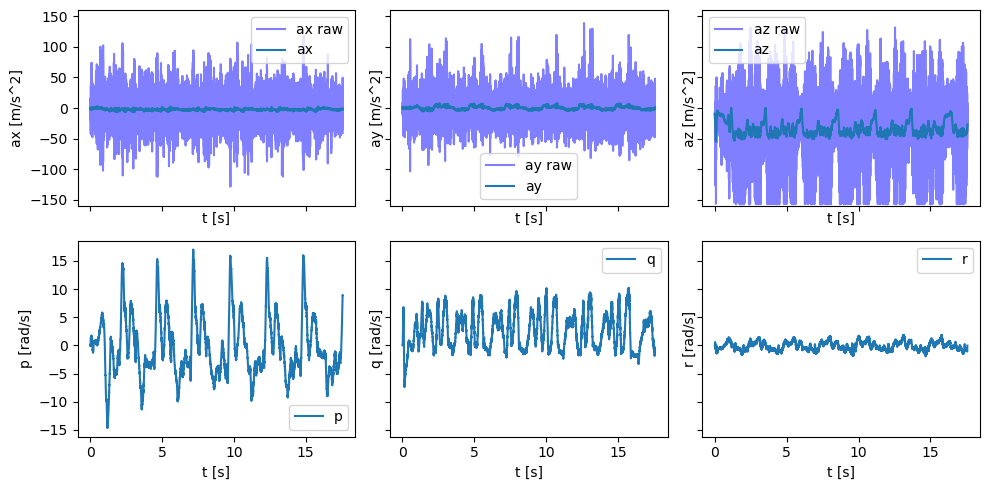

In [31]:
imu_plot(data)

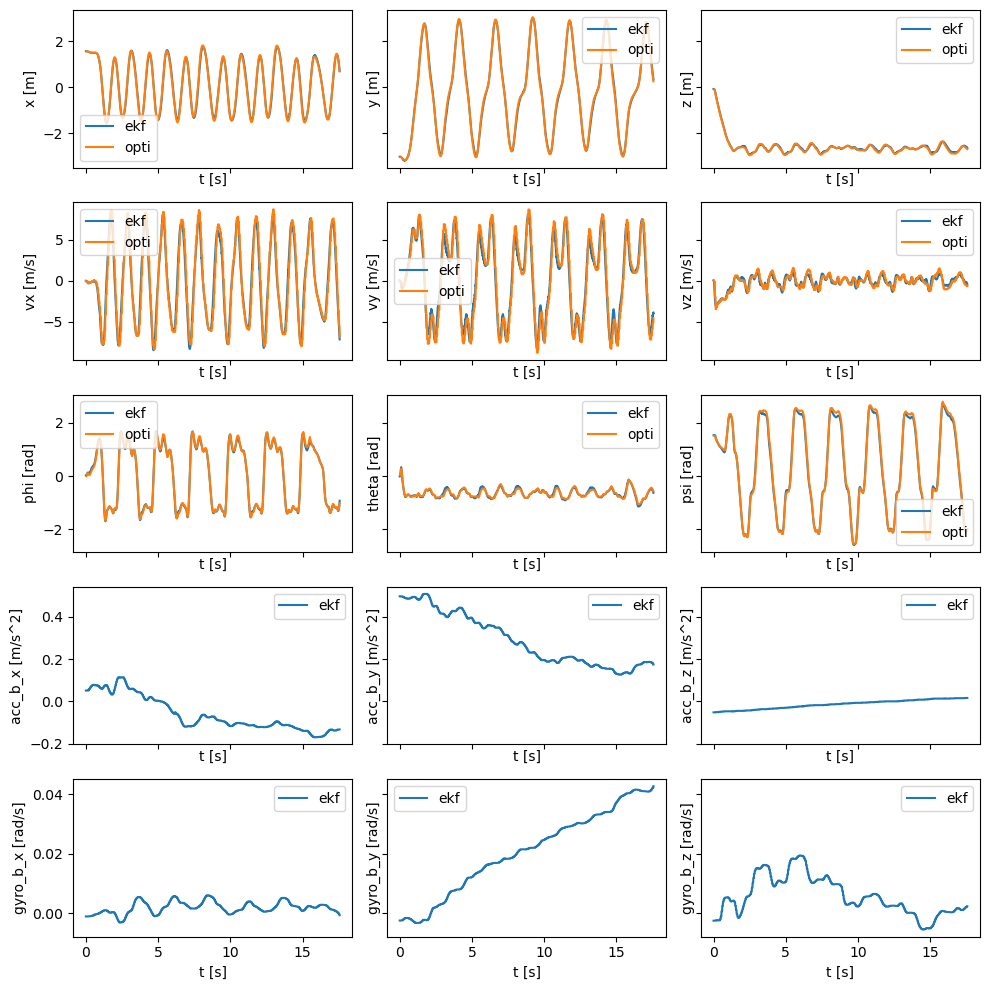

In [38]:
ekf_plot(data)

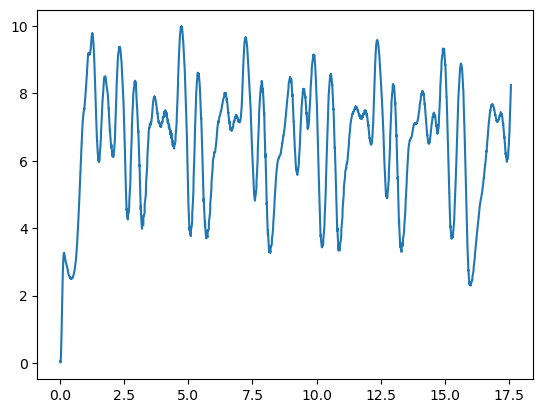

In [16]:
plt.plot(data['t'], data['v'])

In [ ]:
k_w, k_x, k_y, k_quadratic_x, k_quadratic_y = fit_thrust_drag_model(data_1) # @Stavrow these are the drag params
print(f'{k_w:.2e} {k_x:.2e} {k_y:.2e} {k_quadratic_x:.2e} {k_quadratic_y:.2e}')

k_w, k_x, k_y, k_quadratic_x, k_quadratic_y = fit_thrust_drag_model(data_2)
print(f'{k_w:.2e} {k_x:.2e} {k_y:.2e} {k_quadratic_x:.2e} {k_quadratic_y:.2e}')

k_w, k_x, k_y, k_quadratic_x, k_quadratic_y = fit_thrust_drag_model(data_3)
print(f'{k_w:.2e} {k_x:.2e} {k_y:.2e} {k_quadratic_x:.2e} {k_quadratic_y:.2e}')

k_w, k_x, k_y, k_quadratic_x, k_quadratic_y = fit_thrust_drag_model(data_4)
print(f'{k_w:.2e} {k_x:.2e} {k_y:.2e} {k_quadratic_x:.2e} {k_quadratic_y:.2e}')

# 1.66e6 5.51e5 5.08e5
# 1.66 5.84 5.29
# 1.57 5.68 7.50
# 1.57 5.68 7.65



In [39]:
""" How to process the data? 
How I do it is take a look at the individual CSV files by using the plot functions above,
then trimming the data to only have the NN, and use the trim_time to remove any hover/recovery part of the data. 
Interpolating is crusial for the rotations to work properly. Gets saved straight to txt so no csv needed
"""
import os
import numpy as np

#dt = data['t'][i] - data['t'][i-1]

# Output folders
output_train_folder = '/home/erin/DroneRacing/dronerace/filter/thrust_drag_model/train_and_validation_txt/data_train'
output_validation_folder = "/home/erin/DroneRacing/dronerace/filter/thrust_drag_model/train_and_validation_txt/data_validation"
train_splits_file = "/home/erin/DroneRacing/dronerace/filter/thrust_drag_model/train_and_validation_txt/splits_train/train_splits.txt"

# Scaling factors
acc_scale = 9.81 / float(2048)  # Scale for acceleration
gyro_scale = (np.pi / 180) / 10  # Scale for gyroscope
quat_scaling = ((127 << 6) - 1)  # Quaternion scaling
umin, umax = 0, 3000  # Fixed min/max values for motor RPM scaling If we specify a wmin above zero we might get negative values
pos_scale = 0.001  # Convert from mm to m
gravity_vector = np.array([0, 0, 9.81])  # Gravity vector

# Function to compute Euler angles from quaternions
def quat_to_euler(qw, qx, qy, qz):
    phi = np.arctan2(2 * (qw * qx + qy * qz), 1 - 2 * (qx**2 + qy**2))
    theta = np.arcsin(2 * (qw * qy - qz * qx))
    psi = np.arctan2(2 * (qw * qz + qx * qy), 1 - 2 * (qy**2 + qz**2))
    return phi, theta, psi

# Function to compute rotation matrix from Euler angles
def Rmat(phi, theta, psi):
    Rx = np.array([[1, 0, 0],
                   [0, np.cos(phi), -np.sin(phi)],
                   [0, np.sin(phi), np.cos(phi)]])
    
    Ry = np.array([[np.cos(theta), 0, np.sin(theta)],
                   [0, 1, 0],
                   [-np.sin(theta), 0, np.cos(theta)]])
    
    Rz = np.array([[np.cos(psi), -np.sin(psi), 0],
                   [np.sin(psi), np.cos(psi), 0],
                   [0, 0, 1]])

    R = Rz @ Ry @ Rx
    return R



# Remove the train_splits.txt file if it exists
try:
    os.remove(train_splits_file)
except FileNotFoundError:
    pass

datasets = [data_1_downsampled, data_2_downsampled, data_3_downsampled, data_4_downsampled]

# print(data_1.keys)

#remove_end_idx_in_split = 100 # should be updated if using longer training times


# Process files
for i, data in enumerate(datasets):
    output_folder = output_validation_folder if i == len(datasets) - 1 else output_train_folder
    output_file = os.path.join(output_folder, f'flight_data_{i+1}.txt')

    with open(output_file, mode='w') as outfile:
        num_rows = len(next(iter(data.values())))
        
        for count_idx in range(num_rows):
            extracted_data = []

            qw = float(data['qw'][count_idx])
            qx = float(data['qx'][count_idx])
            qy = float(data['qy'][count_idx])
            qz = float(data['qz'][count_idx])
            phi, theta, psi = quat_to_euler(qw, qx, qy, qz)

            # Compute body velocities and rates using the rotation matrix
            vel_world = [float(data['ekf_vx'][count_idx]), float(data['ekf_vy'][count_idx]), float(data['ekf_vz'][count_idx])]
            gyro_body = [float(data[f'gyroADCafterRpm[{j}]'][count_idx]) * gyro_scale for j in range(3)] # get pqr to get filtered values
            unscaled_rpm = [float(data[f'omega[{j}]'][count_idx]) for j in range(4)]

            R_world_to_body = Rmat(phi, theta, psi).T
            gravity_body = R_world_to_body @ gravity_vector
            vel_body = R_world_to_body @ vel_world
            acc_z = float(data['az'][count_idx])
            accelerations = [float(data['ax'][count_idx]), float(data['ay'][count_idx]), float(data['az'][count_idx])] #specific force
            motor_rpm = [(float(data[f'omega[{j}]'][count_idx]) - umin) / (umax - umin) for j in range(4)]
            ekf_pos = [float(data['ekf_x'][count_idx]), float(data['ekf_y'][count_idx]), float(data['ekf_z'][count_idx])]
            time = float(data['t'][count_idx])



            # Write data to the file in the required order
            extracted_data.extend([f"{acc_z:.6f}"])
            extracted_data.extend([f"{gyro_body[j]:.6f}" for j in range(3)])  # Gyro rates
            extracted_data.extend([f"{qw:.6f}", f"{qx:.6f}", f"{qy:.6f}", f"{qz:.6f}"])  # Quaternions
            extracted_data.extend([f"{motor_rpm[j]:.6f}" for j in range(4)])  # Scaled motor RPMs [0, 1]
            extracted_data.extend([f"{vel_body[j]:.6f}" for j in range(3)])  # Body velocity (vx, vy, vz)
            extracted_data.extend([f"{gravity_body[j]:.6f}" for j in range(3)])  # Gravity vector in the body frame (gx, gy, gz)
            extracted_data.extend([f"{unscaled_rpm[j]:.6f}" for j in range(4)])  # Unscaled motor RPMs
            extracted_data.extend([f"{ekf_pos[j]:.6f}" for j in range(3)])  # EKF positions (x, y, z)
            extracted_data.extend([f"{phi:.6f}", f"{theta:.6f}", f"{psi:.6f}"])  # Euler angles
            extracted_data.extend([f"{accelerations[j]:.6f}" for j in range(3)])  # Accelerations

            outfile.write(' '.join(extracted_data) + '\n')
            if output_folder == output_train_folder:
                with open(train_splits_file, mode='a') as outsplitfile:
                    if count_idx < num_rows:
                    #if count_idx < num_rows - remove_end_idx_in_split:

                        outsplitfile.write(f"flight_data_{i+1} {count_idx}\n")

    print(f"Extraction complete for flight data {i+1}. Data saved to {output_file}.")

print("All datasets processed.")


Extraction complete for flight data 1. Data saved to /home/erin/DroneRacing/dronerace/filter/thrust_drag_model/train_and_validation_txt/data_train/flight_data_1.txt.
Extraction complete for flight data 2. Data saved to /home/erin/DroneRacing/dronerace/filter/thrust_drag_model/train_and_validation_txt/data_train/flight_data_2.txt.
Extraction complete for flight data 3. Data saved to /home/erin/DroneRacing/dronerace/filter/thrust_drag_model/train_and_validation_txt/data_train/flight_data_3.txt.
Extraction complete for flight data 4. Data saved to /home/erin/DroneRacing/dronerace/filter/thrust_drag_model/train_and_validation_txt/data_validation/flight_data_4.txt.
All datasets processed.
